# Notebook for input data analysis 

In [158]:
import pandas as pd
import numpy as np 
import scipy.sparse as sps
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('..')

## URM Analysis 

In [159]:
dataset = pd.read_csv('data_train.csv', names=["user", "item", "interaction"], header=0)
dataset

,user,item,interaction
0,0,10080,1.0
1,0,19467,1.0
2,1,2665,1.0
3,1,7494,1.0
4,1,17068,1.0
...,...,...,...
113263,7945,2476,1.0
113264,7945,12319,1.0
113265,7945,21384,1.0
113266,7946,8699,1.0


#### Extracting some statistics from the URM 

In [160]:
unique_users, min_users, max_users = len(dataset.user.unique()), dataset.user.min(), dataset.user.max()
unique_items, min_items, max_items = len(dataset.item.unique()), dataset.item.min(), dataset.item.max()
print('Num Users: {}, Min: {}, Max: {}'.format(unique_users, min_users, max_users))
print('Num Items: {}, Min: {}, Max: {}\n'.format(unique_items, min_items, max_items))
print('Missing users:', (max_users + 1)-unique_users)
print('Missing items:', (max_items + 1)-unique_items, '\n')

n_interactions = len(dataset)

print ("The number of interactions is {}\n".format(n_interactions))

# Check on average how many interaction we have for each user 
print ("Average interactions per user {:.2f}".format(n_interactions/unique_users))

# Check on average how much interaction we have for each items
print ("Average interactions per item {:.2f}\n".format(n_interactions/unique_items))

# Measure how much each user intercat on average with all the items inside the dataset
# In such a case is Interactions = NumUser*NumTem we will have 0% of data sparsity 
print ("Sparsity {:.2f} %".format((1-float(n_interactions)/(unique_items*unique_users))*100))

Num Users: 7947, Min: 0, Max: 7946
Num Items: 24896, Min: 0, Max: 25974

Missing users: 0
Missing items: 1079 

The number of interactions is 113268

Average interactions per user 14.25
Average interactions per item 4.55

Sparsity 99.94 %


In [161]:
# Find for each user the number of interaction 

grouped_users = dataset.groupby(['user']).count()
grouped_users

,item,interaction
user,,
0,2,2
1,6,6
2,2,2
3,2,2
4,7,7
...,...,...
7942,5,5
7943,3,3
7944,156,156


In [162]:
# Take for each user the number of interaction, forted now for number of interaction in descending order 
grouped_users=grouped_users.sort_values(by=['item'], ascending=False)
grouped_users

,item,interaction
user,,
7382,1653,1653
2282,1108,1108
1863,1074,1074
7685,651,651
5628,643,643
...,...,...
3146,1,1
7264,1,1
552,1,1


Here i'm computing the unique numbers of interactions. The number of interactions follows an exponential curve. Notice how until 117, we have a 1 step increment.

To be clearer, the following matrix reports all te possible number of interactions computed in the URM, so there are users with 2,3,27,31,99,552 interactions, but there aren't any users with (for example) 203, 146, 2000, 490 interactions.

In [163]:
unique_values_interactions = grouped_users['item'].unique() #valori unici del conteggio di interazioni.
unique_values_interactions

array([1653, 1108, 1074,  651,  643,  609,  546,  536,  522,  475,  452,
        447,  396,  394,  383,  338,  332,  326,  320,  312,  308,  296,
        279,  273,  272,  264,  258,  254,  240,  239,  238,  237,  227,
        225,  224,  219,  212,  209,  207,  204,  200,  198,  196,  193,
        190,  188,  187,  184,  183,  182,  181,  180,  176,  174,  168,
        167,  165,  164,  158,  156,  154,  153,  151,  150,  144,  140,
        139,  138,  137,  136,  135,  133,  132,  131,  129,  128,  125,
        124,  121,  120,  117,  116,  112,  111,  110,  109,  108,  107,
        106,  105,  104,  103,  102,  101,  100,   99,   98,   97,   96,
         95,   94,   93,   92,   91,   90,   89,   88,   87,   86,   85,
         84,   82,   81,   79,   78,   77,   76,   75,   74,   73,   72,
         71,   70,   69,   68,   67,   66,   65,   64,   63,   62,   61,
         60,   59,   58,   57,   56,   55,   54,   53,   52,   51,   50,
         49,   48,   47,   46,   45,   44,   43,   

Grouping the interactions values and counting them. Basically in the following dataframe you can see that there is only 1 user with 1073 interactions, but there are 1148 users with 3 interactions. 

In [174]:
# indica per ogni numero di interazione, quanti utenti hanno avuto quel numero di interazioni

gruped_interactions = grouped_users.groupby(['item']).count().sort_values(by=['item'], ascending=True).reset_index()
gruped_interactions

,item,interaction
0,1,93
1,2,995
2,3,1148
3,4,933
4,5,605
...,...,...
187,643,1
188,651,1
189,1074,1
190,1108,1


In [165]:
# In fact these are the total number of user 

gruped_interactions['interaction'].sum()

7947

Simply sorting the dataframe in order to get the most common number of interactions. The most common ones are 3,2,4,8 and 5 interactions.

In [166]:
#gruped_interactions = gruped_interactions.sort_values(by=['interaction'])
#gruped_interactions = gruped_interactions.reset_index()

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    display(gruped_interactions)

# Numero di interazioni e quanti utenti hanno avuto quel numero di interazioni

Clearly there's an exponential distribution.

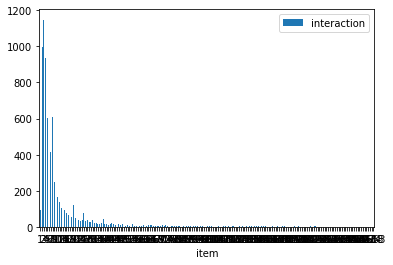

In [186]:
#simple plot. 

plot = gruped_interactions.plot.bar(x='item', y='interaction', rot=0)

3 is the most common number of interactions. Do users with 3 interaction have the same items in common (on average)? Let's check it

In [187]:
dataset = pd.read_csv('data_train.csv')
grouped_users = dataset.groupby(['row']).count()
grouped_users

filtered_users_3_interactions = grouped_users.loc[grouped_users['col'] == 3]
filtered_users_3_interactions = filtered_users_3_interactions.reset_index()

IDs = filtered_users_3_interactions['row']
IDs

0          8
1         12
2         14
3         24
4         31
        ... 
1143    7924
1144    7929
1145    7933
1146    7938
1147    7943
Name: row, Length: 1148, dtype: int64

Now we have a dataframe with 3 interactions per user with the users with only 3 interactions. 

In [ ]:
dataset = pd.read_csv('data_train.csv')

mask = dataset['row'].isin(filtered_users_3_interactions['row'])
filtered_dataset_3_interactions = dataset.loc[mask]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(filtered_dataset_3_interactions)

Let's group by item ID so we'll see how many times each item appears in our list of 3 interactions users.

In [ ]:
items_ID_3_interactions = filtered_dataset_3_interactions.groupby(['col']).count()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(items_ID_3_interactions)


Sort and see the most popular item with 3 interactions

In [ ]:
items_ID_3_interactions = items_ID_3_interactions.sort_values(by=['row'], ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(items_ID_3_interactions)

The dataframe is enough to conclude that we have again an exponential distribution. Let's check if those popular items with 3 interactions, are also the most popular overall.

In [ ]:
top_items_3_interactions = items_ID_3_interactions.loc[items_ID_3_interactions['row'] >= 6]
top_items_3_interactions = top_items_3_interactions.reset_index()
top_items_3_IDS = top_items_3_interactions['col']
top_items_3_IDS

In [ ]:
dataset = pd.read_csv('data_train.csv')
grouped_items = dataset.groupby(['col']).count()
grouped_items.sort_values(by=['row'], ascending=False)


The items that are the most popular considering users that had only 3 interactions, are also the items that are the most popular overall! Can this be a hint? 